In [1]:
using Gen
using Plots

In [2]:
a = 1 + 1

2

In [3]:
@gen function line_model(xs::Vector{Float64})
    # We begin by sampling a slope and intercept for the line.
    # Before we have seen the data, we don't know the values of
    # these parameters, so we treat them as random choices. The
    # distributions they are drawn from represent our prior beliefs
    # about the parameters: in this case, that neither the slope nor the
    # intercept will be more than a couple points away from 0.
    slope = ({:slope} ~ normal(0, 1))
    intercept = ({:intercept} ~ normal(0, 2))
    
    # We define a function to compute y for a given x
    function y(x)
        return slope * x + intercept
    end

    # Given the slope and intercept, we can sample y coordinates
    # for each of the x coordinates in our input vector.
    for (i, x) in enumerate(xs)
        # Note that we name each random choice in this loop
        # slightly differently: the first time through,
        # the name (:y, 1) will be used, then (:y, 2) for
        # the second point, and so on.
        ({(:y, i)} ~ normal(y(x), 0.1))
    end

    # Most of the time, we don't care about the return
    # value of a model, only the random choices it makes.
    # It can sometimems be useful to return something
    # meaningful, however; here, we return the function `y`.
    return y
end;


In [4]:
xs = [-5., -4., -3., -2., -1., 0., 1., 2., 3., 4., 5.];


In [5]:
y = line_model(xs)


y (generic function with 1 method)

In [6]:
trace = Gen.simulate(line_model, (xs,));

println(trace)

Gen.DynamicDSLTrace{DynamicDSLFunction{Any}}(DynamicDSLFunction{Any}(Dict{Symbol, Any}(), Dict{Symbol, Any}(), Type[Vector{Float64}], false, Union{Nothing, Some{Any}}[nothing], Main.var"##line_model#277", Bool[0], false), Trie{Any, Gen.ChoiceOrCallRecord}(Dict{Any, Gen.ChoiceOrCallRecord}((:y, 11) => Gen.ChoiceOrCallRecord{Float64}(4.1040088625835764, 1.3565528284253054, NaN, true), (:y, 3) => Gen.ChoiceOrCallRecord{Float64}(-3.1176559488593725, 1.220623207607883, NaN, true), :intercept => Gen.ChoiceOrCallRecord{Float64}(-0.38257315763622296, -1.6303809913825869, NaN, true), (:y, 1) => Gen.ChoiceOrCallRecord{Float64}(-4.6333421810113675, -0.8749054190733592, NaN, true), (:y, 8) => Gen.ChoiceOrCallRecord{Float64}(1.2727470112110963, 0.5386288931480068, NaN, true), (:y, 7) => Gen.ChoiceOrCallRecord{Float64}(0.3485455415304758, 0.07885462577246072, NaN, true), (:y, 5) => Gen.ChoiceOrCallRecord{Float64}(-1.271747174382345, 1.3830386895014173, NaN, true), (:y, 6) => Gen.ChoiceOrCallRecord{F

In [7]:
Gen.get_args(trace)


([-5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0],)

In [8]:
Gen.get_choices(trace)

│
├── (:y, 11) : 4.1040088625835764
│
├── (:y, 3) : -3.1176559488593725
│
├── :intercept : -0.38257315763622296
│
├── (:y, 1) : -4.6333421810113675
│
├── (:y, 8) : 1.2727470112110963
│
├── (:y, 7) : 0.3485455415304758
│
├── (:y, 5) : -1.271747174382345
│
├── (:y, 6) : -0.48059336566388133
│
├── (:y, 10) : 3.167999327485703
│
├── :slope : 0.8926607639063145
│
├── (:y, 4) : -2.407683090406635
│
├── (:y, 2) : -3.8942808255585906
│
└── (:y, 9) : 2.224438906105145


In [9]:
choices = Gen.get_choices(trace)
choices[:slope]


0.8926607639063145

In [10]:
function render_trace(trace; show_data=true)
    
    # Pull out xs from the trace
    xs, = get_args(trace)
    
    xmin = minimum(xs)
    xmax = maximum(xs)

    # Pull out the return value, useful for plotting
    y = get_retval(trace)
    
    # Draw the line
    test_xs = collect(range(-5, stop=5, length=1000))
    fig = plot(test_xs, map(y, test_xs), color="black", alpha=0.5, label=nothing,
                xlim=(xmin, xmax), ylim=(xmin, xmax))

    if show_data
        ys = [trace[(:y, i)] for i=1:length(xs)]
        
        # Plot the data set
        scatter!(xs, ys, c="black", label=nothing)
    end
    
    return fig
end;


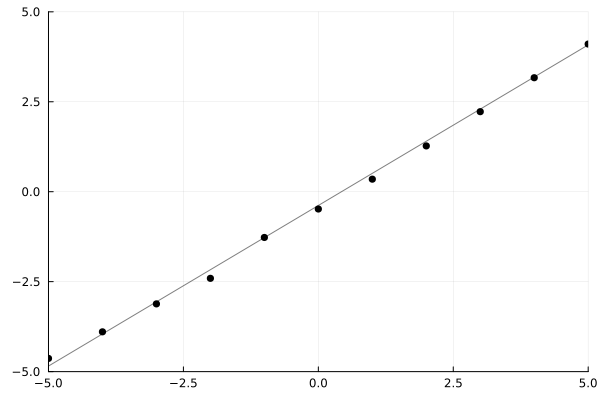

In [11]:
render_trace(trace)


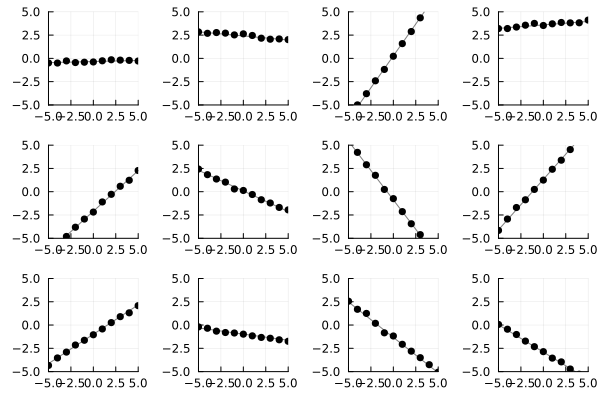

In [12]:
function grid(renderer::Function, traces)
    Plots.plot(map(renderer, traces)...)
end;

traces = [Gen.simulate(line_model, (xs,)) for _=1:12]
grid(render_trace, traces)
